In [784]:
import csv
import math
import random
from math import *

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### DECLARACION DE LAS FUNCIONES DEL PROCEDIMIENTO MANUAL

In [785]:
# los nombres de las clases categóricas se cambian a datos numéricos
# por ejemplo: sí y no codificados en 1 y 0
def encodeClass(mydata):
    classes = []
    for i in range(len(mydata)):
        if mydata[i][-1] not in classes:
            classes.append(mydata[i][-1])
    for i in range(len(classes)):
        for j in range(len(mydata)):
            if mydata[j][-1] == classes[i]:
                mydata[j][-1] = i
    return mydata                   

In [786]:
def splitting(mydata, ratio):
    train_num = int(len(mydata) * ratio)
    train = []
    # inicialmente el conjunto de prueba tendrá todo el conjunto de datos
    test = list(mydata)
    while len(train) < train_num:
        # índice generado aleatoriamente desde el rango 0
        # a la longitud del conjunto de prueba
        index = random.randrange(len(test))
        # del conjunto de prueba, extraiga filas de datos y póngalo en marcha
        train.append(test.pop(index))
    return train, test #Dividiendo los datos

In [787]:
# Agrupa los datos de cada clase sí o no en el diccionario, por ejemplo: dict[sí] y dict[no]
def groupUnderClass(mydata):
      dict = {}
      for i in range(len(mydata)):
          if (mydata[i][-1] not in dict):
              dict[mydata[i][-1]] = []
          dict[mydata[i][-1]].append(mydata[i])
      return dict
 

In [788]:
# Cálcular de la media
def mean(numbers):
    return sum(numbers)/float(len(numbers))

In [789]:
# Calcular la desviación estándar
def std_dev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x - avg, 2) for x in numbers]) / (len(numbers) - 1)
    return math.sqrt(variance)

In [790]:
def meanAndStdDev(mydata):
    info = [(mean(attribute), std_dev(attribute)) for attribute in zip(*mydata)]
    del info[-1]
    return info

In [791]:
# encuentra la media y la desviación estándar en cada clase
def meanAndStdDevForClass(mydata):
    info = {}
    dict = groupUnderClass(mydata)
    #print(dict.keys())
    for classValue, instances in dict.items():
        info[classValue] = meanAndStdDev(instances)
    return info

In [792]:
# Calcular la función de densidad de probabilidad gaussiana
def calculateGaussianProbability(x, mean, stdev):
    expo = exp(-((x - mean) ** 2) / (2 * stdev ** 2))
    return (1 / (sqrt(2 * pi) * stdev)) * expo

In [793]:
# Calcular probabilidades de clase
def calculateClassProbabilities(info, test):
    probabilities = {}
    for classValue, classSummaries in info.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, std_dev = classSummaries[i]
            x = test[i]
            probabilities[classValue] *= calculateGaussianProbability(x, mean, std_dev)
    return probabilities

In [794]:
# Hacer predicción: la probabilidad más alta es la predicción
def predict(info, test):
    #print(test)
    probabilities = calculateClassProbabilities(info, test)
    #print(probabilities)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

In [795]:
# devuelve predicciones para un conjunto de ejemplos
def getPredictions(info, test):
    predictions = []
    for i in range(len(test)):
        result = predict(info, test[i])
        predictions.append(result)
    return predictions

In [796]:
# Puntuación de precisión
def accuracy_rate(test, predictions):
    correct = 0
    for i in range(len(test)):
        if test[i][-1] == predictions[i]:
            correct += 1
    return (correct / float(len(test))) * 100.0

### DESCRIPCION DE LOS DATOS

In [797]:
# Ruta de datos en su sistema
filename = r'Breast_cancer_data.csv'
dataset = pd.read_csv(filename,  delimiter=',')
dataset.head(-11)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.990,10.38,122.80,1001.0,0.11840,0
1,20.570,17.77,132.90,1326.0,0.08474,0
2,19.690,21.25,130.00,1203.0,0.10960,0
3,11.420,20.38,77.58,386.1,0.14250,0
4,20.290,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
553,9.333,21.94,59.01,264.0,0.09240,1
554,12.880,28.92,82.50,514.3,0.08123,1
555,10.290,27.61,65.67,321.4,0.09030,1
556,10.160,19.59,64.73,311.7,0.10030,1


In [798]:
%%capture #Comentar esta linea
fig, axes = plt.subplots(2,3)
fig.set_size_inches(18.5, 9.5)
fig.tight_layout()
sns.distplot(dataset.values[:,0],ax=axes[0][0]).set_title("Mean radius")
sns.distplot(dataset.values[:,1],ax=axes[0][1]).set_title("Mean texture")
sns.distplot(dataset.values[:,2],ax=axes[0][2]).set_title("Mean perimeter")
sns.distplot(dataset.values[:,3],ax=axes[1][0]).set_title("Mean area")
sns.distplot(dataset.values[:,4],ax=axes[1][1]).set_title("Mean smoothness")
axes[1][2].hist(dataset.values[:,5])
axes[1][2].set_title("Diagnosis")


UsageError: unrecognized arguments: esta linea


1    357
0    212
Name: diagnosis, dtype: int64


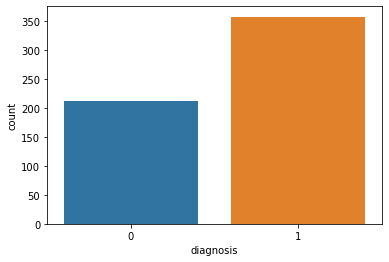

In [799]:
# Obtener un recuento del número de malignos (1) o benignos (0)
print(dataset['diagnosis'].value_counts())
sns.countplot(x = dataset['diagnosis']);

### PROCEDIMIENTO MANUAL

Preparamos los datos

In [800]:
# Cargar el archivo y guardarlo en la lista mydata
mydata = csv.reader(open(filename, "rt"))
mydata = list(mydata)
del mydata[0]
#misdatos = encodeClass(misdatos)

# Normalizar los datos
for i in range(len(mydata)):
    mydata[i] = [float(x) for x in mydata[i]]

# Relación de la división = 0.7
# El 70 % de entrenamiento y el 30 % de prueba 
ratio = 0.7
train_data, test_data = splitting(mydata, ratio)

#para el uso de la libreria
X_train = [x[:-1] for x in train_data]
X_test = [x[:-1] for x in test_data]
y_train = [y[-1] for y in train_data]
y_test = [y[-1] for y in test_data]

print('INFO: Total number of examples are: ', len(mydata))
print('INFO: Out of these, training examples are: ', len(train_data))
print("INFO: Test examples are: ", len(test_data))

INFO: Total number of examples are:  569
INFO: Out of these, training examples are:  398
INFO: Test examples are:  171


Aplicamos el modelo manual

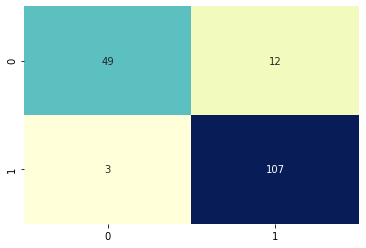

INFO: Accuracy of the model is: 91.23% 



In [801]:
# Se calcula la media y la desviacion estandar de los atributos para cada clase
result = meanAndStdDevForClass(train_data)

# Se obtiene las predicciones de cada uno de las filas del conjunto de pruebas
y_predictions = getPredictions(result, test_data)

#Se genera la matriz de confusion entre los datos reales y la prediccion
cm = confusion_matrix(y_test, y_predictions) 
sns.heatmap(cm,annot=True,fmt="d",cbar=False,cmap="YlGnBu")
plt.show()

# Mostramos la presicion del modelo
accuracy = accuracy_rate(test_data, y_predictions)
print("INFO: Accuracy of the model is: {:.2f}% \n".format(accuracy))

### APLICANDO LA LIBRERIA SKLEARN

In [802]:
#X = dataset.iloc[:,:-1].values
#Y = dataset.iloc[:, -1].values

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

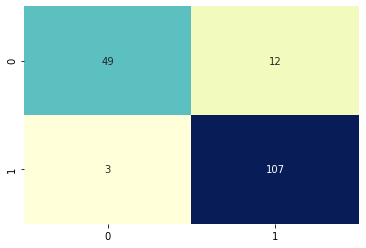

INFO: Accuracy of your model is : 91.23% 

              precision    recall  f1-score   support

         0.0       0.94      0.80      0.87        61
         1.0       0.90      0.97      0.93       110

    accuracy                           0.91       171
   macro avg       0.92      0.89      0.90       171
weighted avg       0.91      0.91      0.91       171



In [803]:
# Se carga el modelo
classifier = GaussianNB()
# Se entrena
classifier.fit(X_train, y_train)
# Se clasifica los datos de prueba
y_predictions = classifier.predict(X_test)

# Se compara los resultados
cm = confusion_matrix(y_test, y_predictions) 
sns.heatmap(cm,annot=True,fmt="d",cbar=False,cmap="YlGnBu")
plt.show()

print("INFO: Accuracy of your model is : {:.2f}% \n".format(accuracy_score(y_test, y_predictions)*100))
print(classification_report(y_test, y_predictions))